In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv("Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df = df.rename(columns={"YearsExperience" : "Yoe"})

In [9]:
df.head()

,Yoe,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


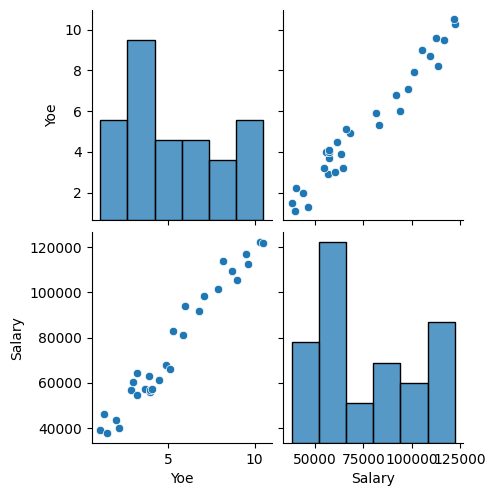

In [16]:
sns.pairplot(df)

In [11]:
X = df["Yoe"]
y = df["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [12]:
ols_data = pd.concat([X_train, y_train], axis = 1)
ols_formula = "Salary ~ Yoe"

In [13]:
model = ols(formula=ols_formula, data=ols_data).fit()

In [15]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     367.3
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           6.90e-14
Time:                        07:39:21   Log-Likelihood:                -212.57
No. Observations:                  21   AIC:                             429.1
Df Residuals:                      19   BIC:                             431.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.562e+04   2993.754      8.556      0.0

<Axes: xlabel='Yoe', ylabel='Salary'>

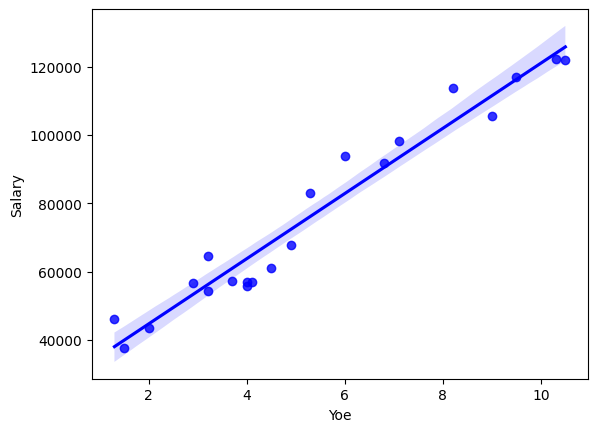

In [19]:
sns.regplot(x="Yoe", y="Salary", data = ols_data, color="blue")

In [20]:
y_pred = model.predict(X_test)

In [21]:
residue = y_test - y_pred

<Axes: ylabel='Count'>

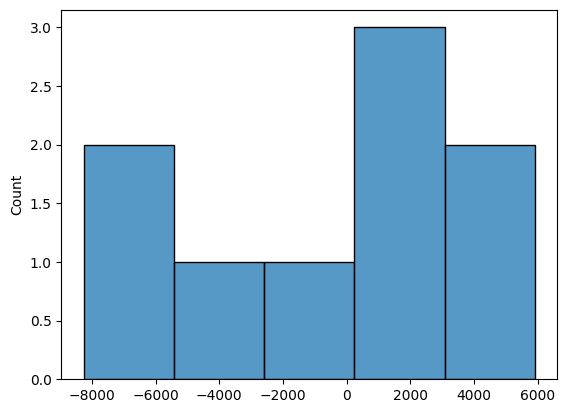

In [22]:
sns.histplot(residue)

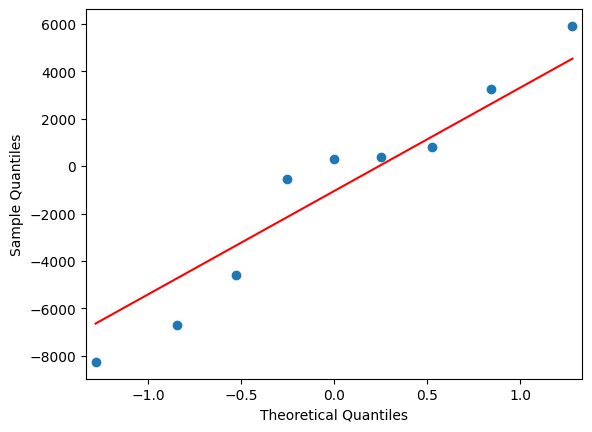

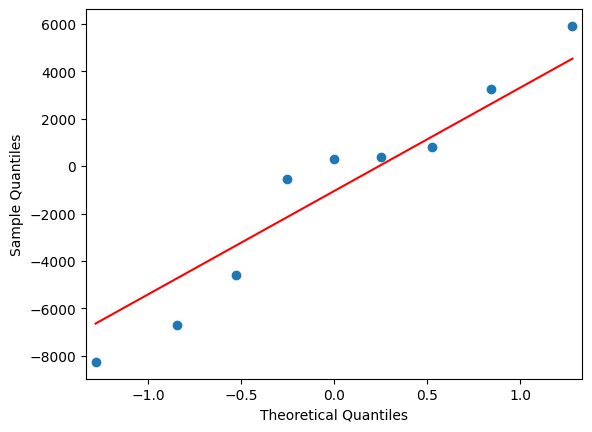

In [23]:
from statsmodels.api import qqplot

qqplot(residue, line='s')

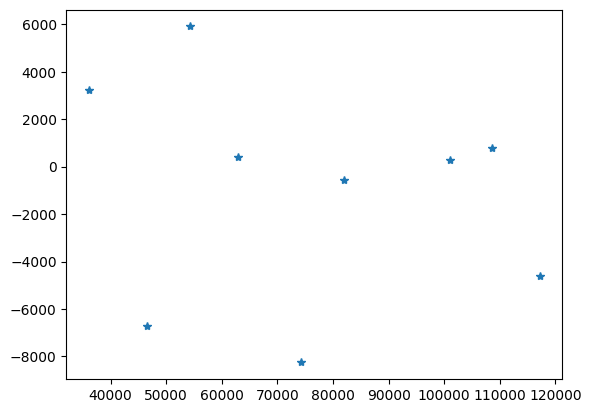

In [26]:
plt.plot(y_pred, residue, "*")